In [47]:

!pip install mnist # if you are working on colab otherwise install it directly from conda/python prompt

import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (3).csv


In [49]:
data = pd.read_csv('bank.csv')

In [50]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [52]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [53]:
data.duplicated().sum()

0

In [54]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [55]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [56]:
data_a = list(data.select_dtypes(include=['float64', 'int64']).columns)


<ipython-input-57-00df415d0678>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[column])
<ipython-input-57-00df415d0678>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[column])
<ipython-input-57-00df415d0678>:18: UserWarning: 

`distplot` is a deprecated function and will be removed

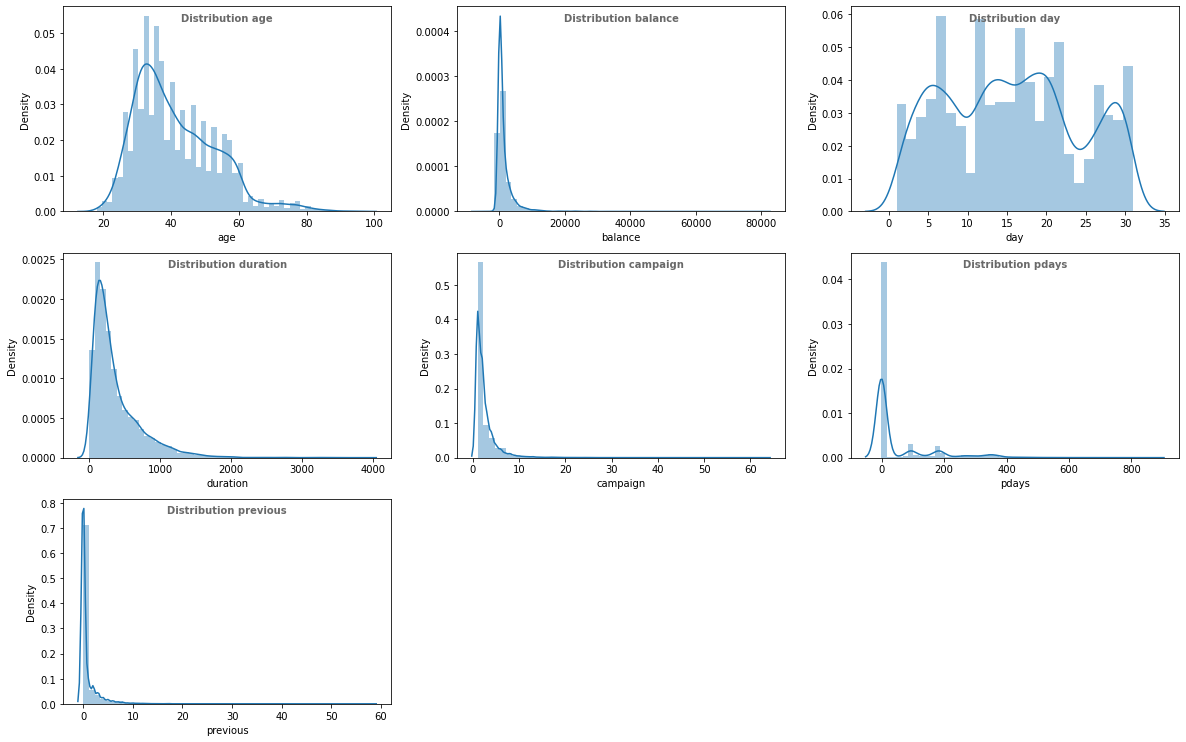

In [57]:
plt.figure(figsize = (20,40))
x = 1
for column in data_a:
    plt.subplot(9, 3, x)
    
    
    
    
    
    
    
    
    
    
    
    
    
    sb.distplot(data[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

In [58]:
#Separating the categorical and numerical columnn
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
num_columns = data[['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']]

     


In [64]:
#Data Transformation

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_columns:
    data[col] = le.fit_transform(data[col])
    
    

     

In [65]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,yes
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,yes
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,yes
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,yes
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,yes


In [66]:
# seperating features and labels
features = data.drop('deposit', axis = 1)
y = data['deposit'].values 

In [67]:
X = data[['duration','poutcome','contact','housing','pdays']]
     


In [68]:
from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() 
encoder.fit(y)
encoded_Y = encoder.transform(y)


Y = to_categorical(encoded_Y)


     

In [69]:
#Data spliting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state= 40)

#Spliting the training model into model and validation
x_model,x_val,y_model,y_val = train_test_split(x_train,y_train,test_size=0.2)
     


In [70]:

## Building the neural network
from keras.layers import Dropout


model = Sequential([

Dense(75, input_dim =5, activation ='relu'),
Dropout(0.5),
Dense(75, activation='relu'),
Dropout(0.5),
Dense(2,activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(x_model, y_model, validation_data= (x_val, y_val), epochs=100, batch_size = 50)


Epoch 1/100
125/125 [==============================] - 7s 6ms/step - loss: 15.5857 - accuracy: 0.5070 - val_loss: 0.8782 - val_accuracy: 0.5451
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 3.3971 - accuracy: 0.5413 - val_loss: 0.6433 - val_accuracy: 0.7582
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 1.3321 - accuracy: 0.5603 - val_loss: 0.6649 - val_accuracy: 0.5956
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.9061 - accuracy: 0.6110 - val_loss: 0.6417 - val_accuracy: 0.7166
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7879 - accuracy: 0.6123 - val_loss: 0.6464 - val_accuracy: 0.6705
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.7330 - accuracy: 0.6376 - val_loss: 0.6158 - val_accuracy: 0.7562
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6496 - val_loss: 0.6019 - val_accuracy: 0.762

In [75]:
y_pred = model.predict(x_test)

105/105 [==============================] - 0s 1ms/step


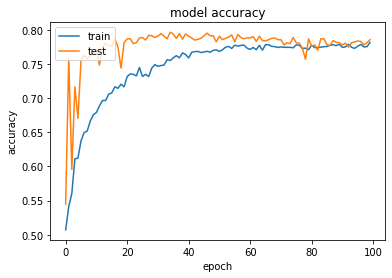

In [76]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

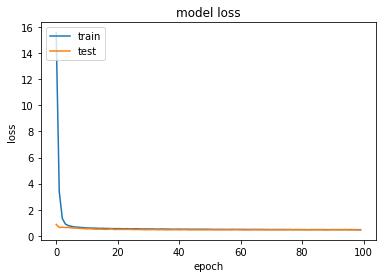

In [77]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [78]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = []

for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

  test = []

for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))

print(f'The accuracy on test data is {accuracy_score(pred, test)}')
     

The accuracy on test data is 0.8014332636607943
